In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading dataset
dataset=load_dataset("lukebarousse/data_jobs")

df=dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

df['job_skills']=df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if isinstance(skills, str) & pd.notna(skills) else skills)

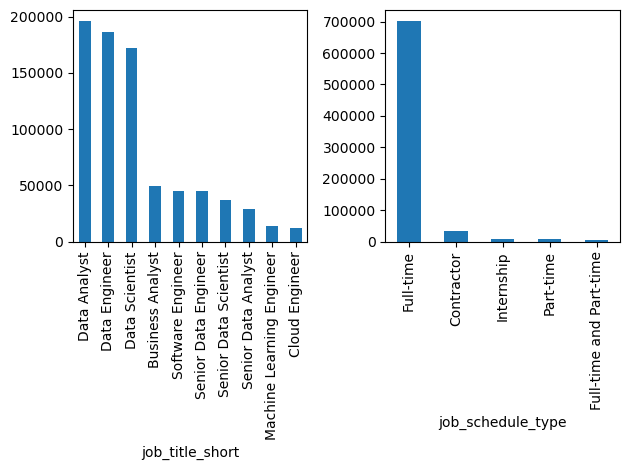

In [3]:
fig, ax=plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head().plot(kind='bar',ax=ax[1])
fig.tight_layout()      # FIG applies on entire figure  ax apllies individual plot 

In [4]:
df_explode=df.explode('job_skills')
df_explode
skill_counts=df_explode.groupby(['job_skills','job_title_short']).size()
df_skill_counts=skill_counts.reset_index(name='skill_count')    #    Series → name sets the column name for the values when converting to a DataFrame with reset_index().
df_skill_counts.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_counts

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [5]:
skills=df_skill_counts['job_title_short'].unique().tolist()

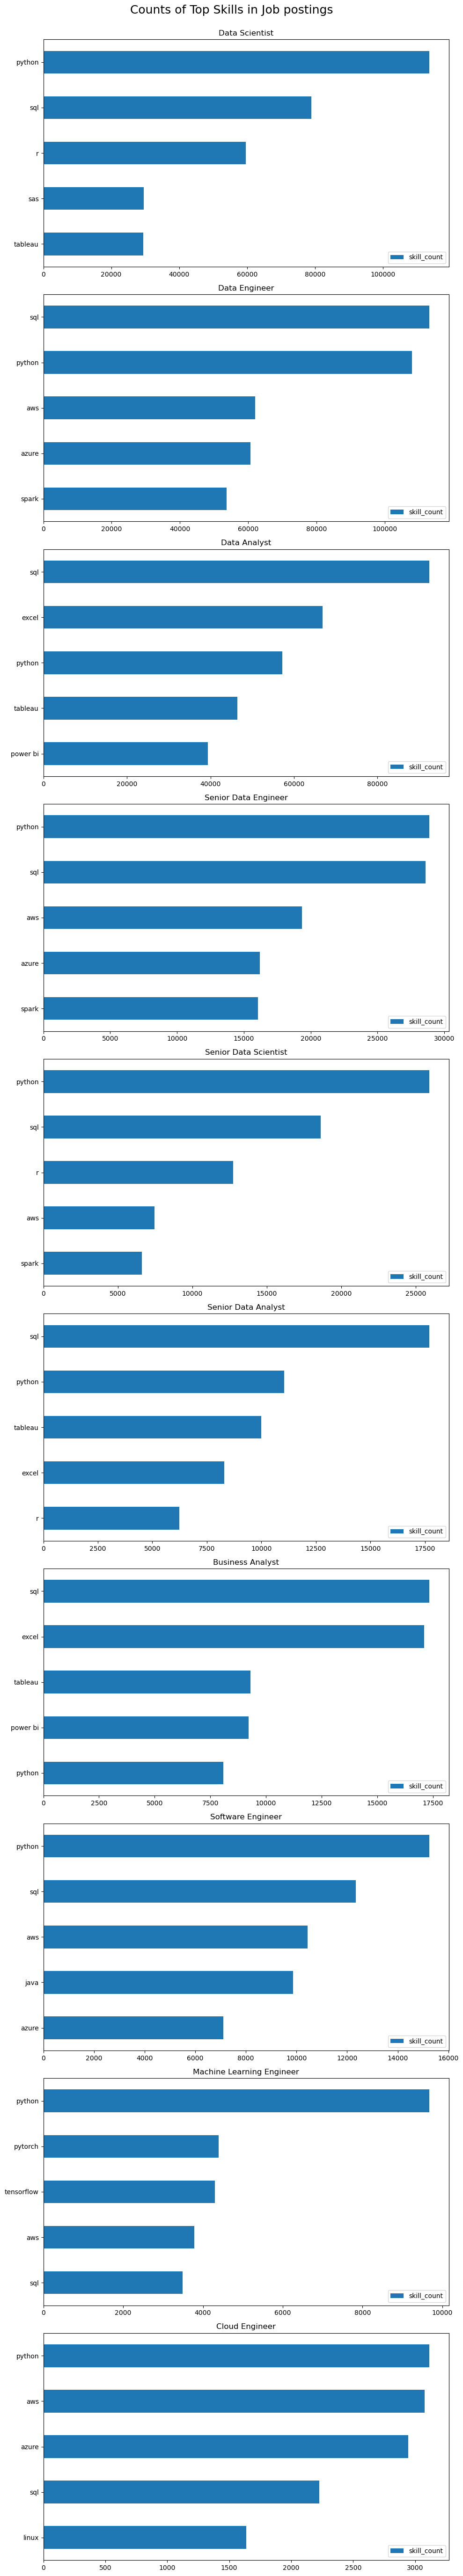

In [6]:
fig,ax=plt.subplots(10,1, figsize=(10,55))

for i,job_title in enumerate(skills):
    df_plot=df_skill_counts[df_skill_counts['job_title_short']==job_title].head()
    df_plot.plot(kind='barh',x='job_skills',y='skill_count', ax=ax[i], title=job_title)
    ax[i].set_ylabel("")
    ax[i].invert_yaxis()




fig.suptitle('Counts of Top Skills in Job postings', fontsize=18, y=1)
fig.tight_layout()

Text(0, 0.5, '')

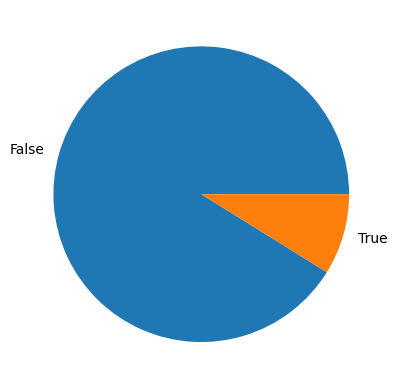

In [7]:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.ylabel("")

Text(0, 0.5, '')

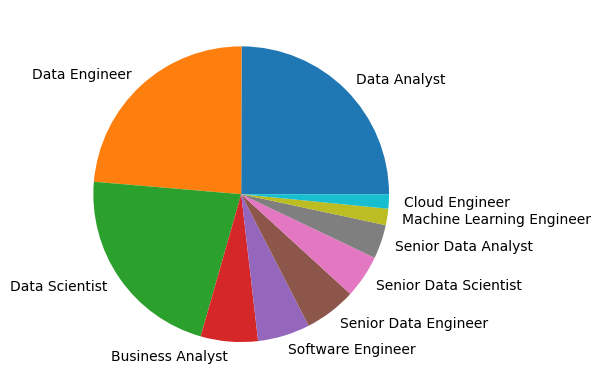

In [8]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.ylabel("")

Text(0, 0.5, '')

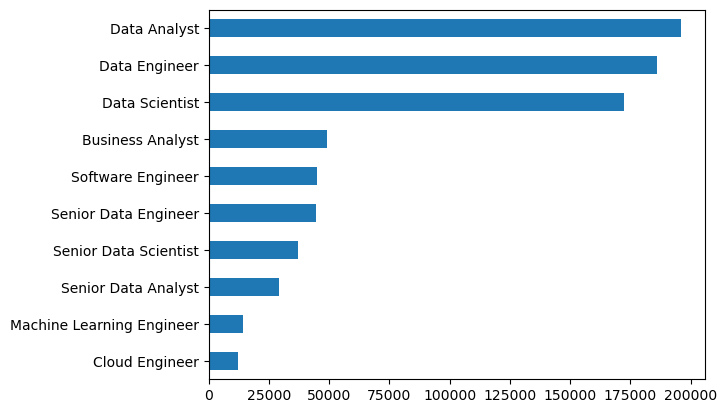

In [9]:
df['job_title_short'].value_counts().plot(kind='barh').invert_yaxis()
plt.ylabel("")

In [10]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


([<matplotlib.patches.Wedge at 0x1efc6374d90>,
 [Text(-1.0577407109780201, 0.3019678597793363, ''),
  Text(1.0577407373768857, -0.3019677673087017, '')])

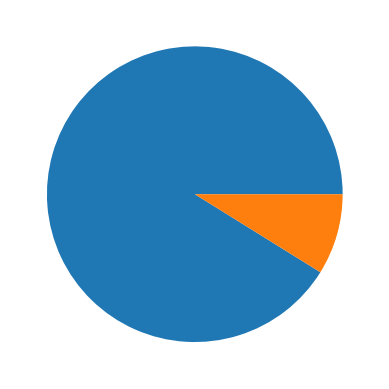

In [11]:
fig,ax=plt.subplots()
ax.pie(df['job_work_from_home'].value_counts())

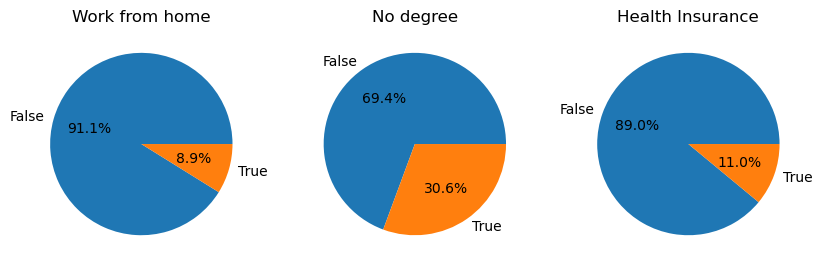

In [18]:
#   dict.items() (Python dictionaries)

#   Returns a view object of (key, value) pairs.
fig,ax=plt.subplots(1,3, figsize=(10,8))

dict_col={'job_work_from_home':'Work from home',
            'job_no_degree_mention':'No degree',
            'job_health_insurance':'Health Insurance'}

# Using matplolib

for i,(col,title) in enumerate(dict_col.items()):
    ax[i].pie(df[col].value_counts(),labels=['False','True'],autopct='%1.1f%%')
    ax[i].set_title(title)


In [ ]:
#   scatter plot
df_DA=df[df['job_title_short']=='Data Analyst']
df_exploded=df_DA.explode('job_skills')
df_final=df_exploded.groupby('job_skills').agg(skill_count=('job_skills','count'),  # skill_count colName
                                                median_salary=('salary_year_avg','median'))
skills_stats=df_final.sort_values(by='skill_count',ascending=False).head(12)
skills_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


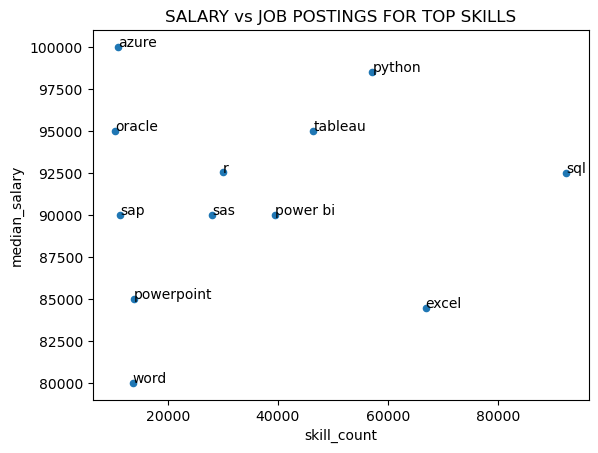

In [ ]:

# Scatter Plot

skills_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.title('SALARY vs JOB POSTINGS FOR TOP SKILLS')
fig.tight_layout()

for i,txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i],skills_stats['median_salary'].iloc[i],txt)


Text(0.5, 1.0, 'Data Analyst Job Salary Distribution in United States')

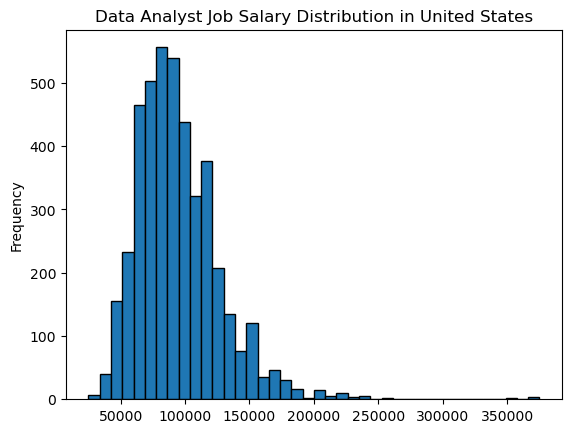

In [50]:

# histogram
job='Data Analyst'
country='United States'
df_job_country=df[(df['job_title_short']==job)& (df['job_country']==country)].copy()
df_job_country['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black')
plt.title(f'{job} Job Salary Distribution in {country}')

<Axes: >

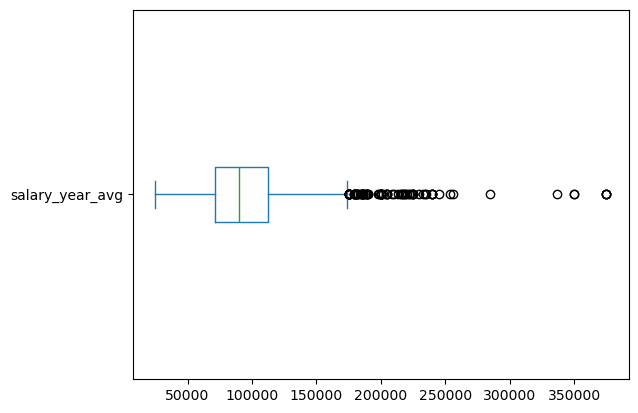

In [52]:
# Box-Whisker Plot

df_job_country=df_job_country.dropna(subset=['salary_year_avg'])
df_job_country['salary_year_avg'].plot(kind='box', vert=False)

Text(0.5, 0.98, 'Data Analyst Job Salary Distribution in United States')

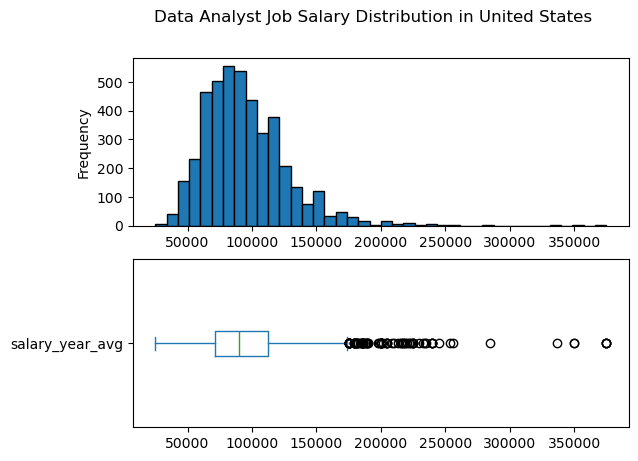

In [56]:
fig,ax=plt.subplots(2,1)
df_job_country['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black',ax=ax[0])
df_job_country['salary_year_avg'].plot(kind='box', vert=False,ax=ax[1])
plt.suptitle(f'{job} Job Salary Distribution in {country}')


In [58]:
JobsTitleList=df['job_title_short'].unique().tolist()

C:\Users\jahna\AppData\Local\Temp\ipykernel_7356\3549518492.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list,labels=JobsTitleList,vert=False)


Text(0.5, 1.0, 'Salary Distribution in India')

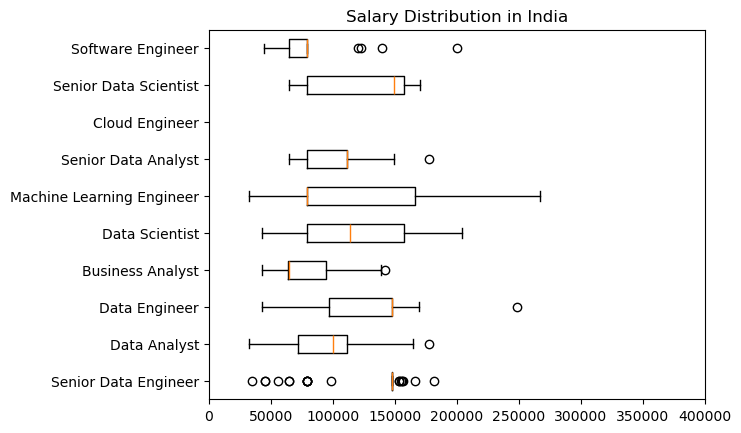

In [74]:

country='India'
df_country=df[df['job_country']==country].copy()
df_country=df_country.dropna(subset=['salary_year_avg'])
job_list=[df_country[df_country['job_title_short']==job]['salary_year_avg'] for job in JobsTitleList]
"""
        Loops through each job title in JobsTitleList.

        Filters rows for that job title only.

        Takes just the salary_year_avg column (Series).

        Collects all these Series objects into a Python list.

        
        [65000, 70000, 72000, ...],   # salaries for Data Analyst
        [90000, 95000, 97000, ...],   # salaries for Data Scientist
        [110000, 115000, 120000, ...] # salaries for ML Engineer

"""

plt.boxplot(job_list,labels=JobsTitleList,vert=False)
plt.xlim(0,400000)
plt.title(f'Salary Distribution in {country}')